# Project 2: Reproducibility in Natural Language Processing



In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-dark')

In [2]:
#Loading in data
sou = pd.read_csv("data/SOTU.csv")

### Processing Speeches with SpaCy

In [3]:
# Importing packages
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [4]:
# subsetting the speech dataframe for speeches from 2000 and onwards
sou_2000 = sou[sou['Year'] >= 2000]

In [5]:
# Processing each speeches using the 'nlp' function
speeches_2000 = []
for speech in tqdm(sou_2000['Text']):
    speeches_2000.append(nlp(speech))


100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


### Analyze Tokens vs Lemmas

#### Token List

In [6]:
# Creating a list of tokens across all speeches that are not spaces, stopwords, or punctuation.
all_tokens = [str(token).lower() for speech in speeches_2000 for token in speech 
        if not token.is_stop and not token.is_punct and not token.is_space]

In [7]:
# printing top 20 tokens
tokens_count = Counter(all_tokens).most_common(20)
for i, token in enumerate(tokens_count):
    print(str(i) + ': ' + str(token))

0: ('america', 816)
1: ('people', 637)
2: ('american', 582)
3: ('new', 530)
4: ('years', 439)
5: ('americans', 437)
6: ('world', 425)
7: ('year', 406)
8: ('country', 369)
9: ('jobs', 348)
10: ('tonight', 344)
11: ('work', 324)
12: ('know', 323)
13: ('let', 320)
14: ('congress', 317)
15: ('nation', 311)
16: ('time', 301)
17: ('help', 282)
18: ('need', 266)
19: ('tax', 255)


#### Lemma List

In [8]:
# Creating a list of lemmas across all speeches
all_lemmas = [token.lemma_.lower() for speech in speeches_2000 for token in speech 
        if not token.is_stop and not token.is_punct and not token.is_space]

# printing top 20 lemmas
lemmas_count = Counter(all_lemmas).most_common(20)
for i, lemma in enumerate(lemmas_count):
    print(str(i) + ': ' + str(lemma))

0: ('year', 845)
1: ('america', 816)
2: ('people', 639)
3: ('american', 587)
4: ('work', 557)
5: ('new', 532)
6: ('job', 486)
7: ('country', 435)
8: ('americans', 432)
9: ('world', 426)
10: ('know', 395)
11: ('nation', 388)
12: ('help', 378)
13: ('need', 353)
14: ('time', 351)
15: ('tonight', 344)
16: ('child', 332)
17: ('let', 326)
18: ('congress', 317)
19: ('come', 301)


#### Token versus Lemma Comparison

The top lemmas look different from the top tokens because similar words are grouped together for the lemmas. For example, the tokens "year" and "years" are counted separately at first, but when they are turned into lemmas, both forms become the word "year". Their counts then add up, which is why the lemma "year" appears much more often.

The same thing happens with the lemma "child". Even though "child" doesn’t show up in the top token list, it appears in the lemma list because spaCy changes words like "children" into the form "child". This makes the lemma count high enough to be one of the most common words. Lemmas give a clearer picture of how often an idea shows up, not just how many different forms of the word appear.

### Common Words

#### Common Words per Year Function

In [9]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    df['Year_int'] = [int(year) for year in df['Year']]
    df_subset = df[df['Year_int'] == int(year)]

    # Step 2: Process the text with spaCy
    speeches = []
    for speech in df_subset['Text']:
        speeches.append(nlp(speech))

    # Step 3: Get lemmas
    all_lemmas = [token.lemma_.lower() for speech in speeches for token in speech 
        if not token.is_stop and not token.is_punct and not token.is_space]
    lemmas_count = Counter(all_lemmas).most_common(n)

    return lemmas_count

In [10]:
# testing it on 2024
get_most_common_words(sou, 2024, 10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Compare 2023 to 2017

Running the function to get the top 20 words for 2017 and 2023.

In [11]:
words_2023 = get_most_common_words(sou, 2023, 20)
words_2017 = get_most_common_words(sou, 2017, 20)

In [12]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [13]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

### Plotting

Plotting the words and their frequencies in a barchart.

In [14]:
# putting the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

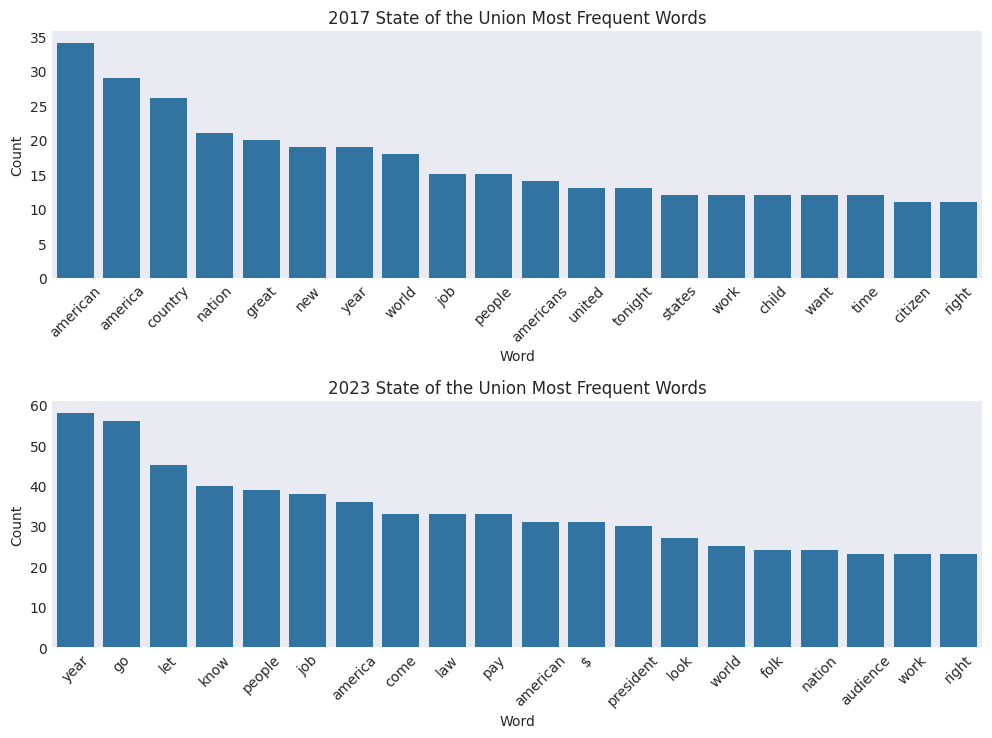

<Figure size 640x480 with 0 Axes>

In [15]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 2017
sns.barplot(data=df_2017, x="Word", y="Count", ax=axes[0])
axes[0].set_title("2017 State of the Union Most Frequent Words")
axes[0].tick_params(axis='x', labelrotation=45)

# 2023
sns.barplot(data=df_2023, x="Word", y="Count", ax=axes[1])
axes[1].set_title("2023 State of the Union Most Frequent Words")
axes[1].tick_params(axis='x', labelrotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig("outputs/2.1_State_of_the_Union_Most_Frequent_Words.png", dpi=300, bbox_inches='tight')

### TF-IDF Vectorization

In [16]:
# imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Train the Vectorizer and Transform the Data

In [17]:
# input to be used for the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [18]:
# Selecting Model
tfidf_model = TfidfVectorizer()

# Fitting TF-IDF vectorizer
tfidf_vectors = tfidf_model.fit_transform(raw_documents=raw_docs)

#### Plot Speeches
First we plot all the speeches on a 2-D grid using PCA

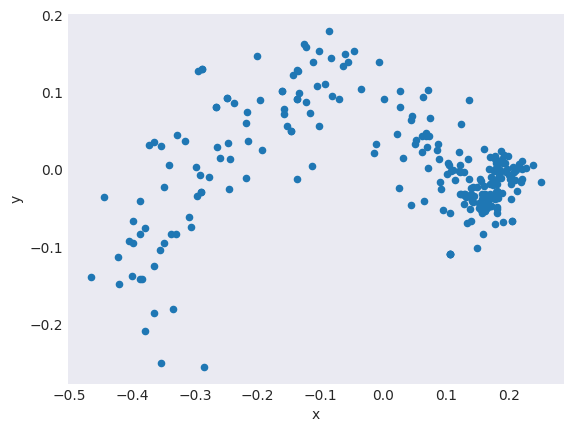

<Figure size 640x480 with 0 Axes>

In [19]:
# Setting PCA to find first 2 principal components
pca = PCA(n_components=2)

# Creating a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
df2d = pd.DataFrame(pca.fit_transform(tfidf_vectors), columns=list('xy'))

# Plotting Data Visualization
df2d.plot(kind='scatter', x='x', y='y')
plt.show()
plt.savefig("outputs/2.2_Speeches_PCA.png", dpi=300, bbox_inches='tight')

Now we use seaborn heatmap with a log-scaled color axis to generate the second chart

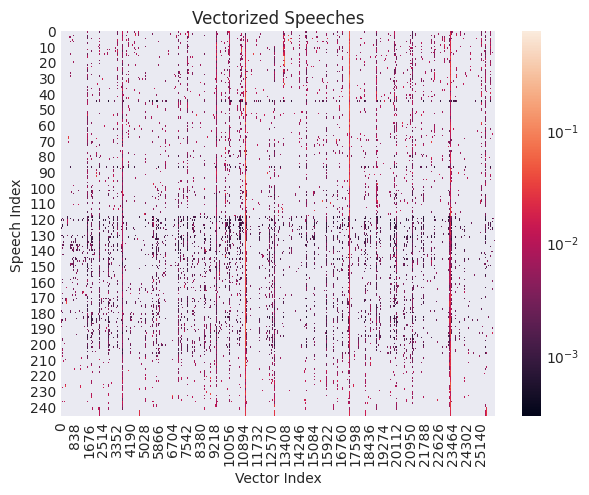

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib.colors import LogNorm

# Densifying the matrix
dense_tfidf = tfidf_vectors.toarray()

# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    dense_tfidf,
    norm=LogNorm()
)

plt.title("Vectorized Speeches")
plt.xlabel("Vector Index")
plt.ylabel("Speech Index")

plt.show()
plt.savefig("outputs/2.3_Vectorized_Speeches.png", dpi=300, bbox_inches='tight')

#### Get the TF-IDF value for certain words and documents

We now examine TF-IDF scores for the top 10 most common words in the first speech

In [21]:
# top ten most common words through whole corpus
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world']

In [22]:
# get each word's index number using the .vocabular_ attributed of vectorizer
word_nums = tfidf_model.vocabulary_

In [23]:
# get their IDF score by using .idf_ at the indices from the previous step
idf_score = []
for word in word_list:
    idx = word_nums[word]
    idf_score.append(tfidf_model.idf_[idx])

In [24]:
# get the tf_idf score for the first speech
tf_idf = []
for word in word_list:
    idx = word_nums[word]
    tf_idf.append(tfidf_vectors[0, idx])

In [25]:
# showing IDF scores and TF-IDF scores for the 10 most common words
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
